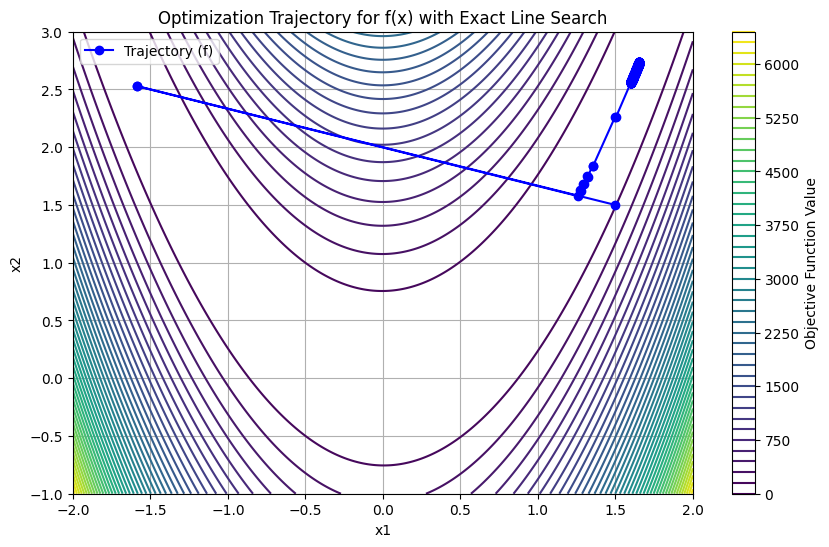

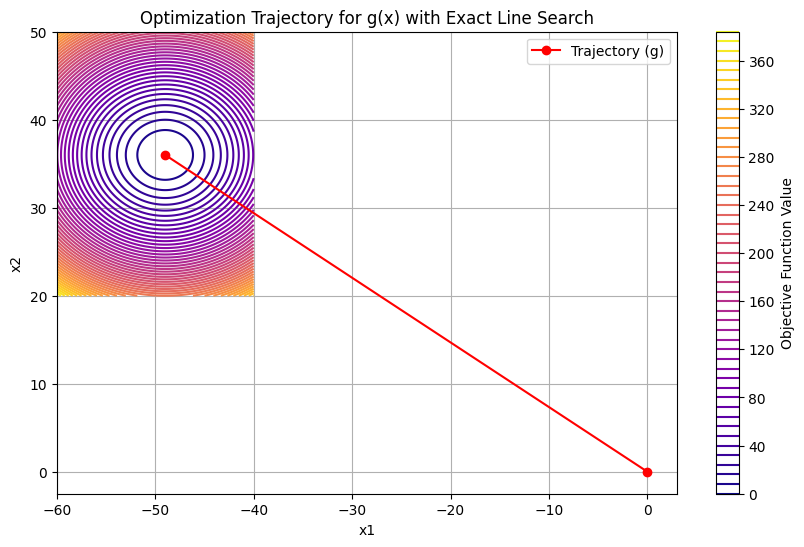

Results for f(x):
Final Minimizer: [1.65444154 2.73648335], Final Objective: 0.119534, Iterations: 1000

Results for g(x):
Final Minimizer: [-49.  36.], Final Objective: 0.000000, Iterations: 1


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions f(x) and g(x) and their gradients
def f(x):
    return 256 * (x[1] - x[0]**2)**2 + (2 - x[0])**2

def grad_f(x):
    df_dx1 = -1024 * x[0] * (x[1] - x[0]**2) - 2 * (2 - x[0])
    df_dx2 = 512 * (x[1] - x[0]**2)
    return np.array([df_dx1, df_dx2])

def g(x):
    return (x[0] + 49)**2 + (x[1] - 36)**2

def grad_g(x):
    dg_dx1 = 2 * (x[0] + 49)
    dg_dx2 = 2 * (x[1] - 36)
    return np.array([dg_dx1, dg_dx2])

# Gradient descent with exact line search
def gradient_descent_exact_line_search(func, grad_func, x0, tau, max_iter=1000):
    x = x0
    k = 0
    trajectory = [x0]

    while np.linalg.norm(grad_func(x)) > tau and k < max_iter:
        p = -grad_func(x)

        # Perform exact line search to find eta_k
        eta_k = exact_line_search(func, x, p)

        # Update x and p
        x = x + eta_k * p
        trajectory.append(x)
        k += 1

    return x, func(x), k, np.array(trajectory)

def exact_line_search(func, x, p, max_iter=100, tol=1e-6):
    eta_low, eta_high = 0, 1
    while max_iter > 0:
        eta_mid = (eta_low + eta_high) / 2
        if func(x + (eta_mid + tol) * p) > func(x + (eta_mid - tol) * p):
            eta_high = eta_mid
        else:
            eta_low = eta_mid
        max_iter -= 1
    return eta_mid

# Parameters
x0_f = np.array([1.5, 1.5])
x0_g = np.array([0.0, 0.0])
tau = 1e-6

# Run gradient descent with exact line search for both functions
x_min_f, f_min_f, iter_f, trajectory_f = gradient_descent_exact_line_search(f, grad_f, x0_f, tau)
x_min_g, f_min_g, iter_g, trajectory_g = gradient_descent_exact_line_search(g, grad_g, x0_g, tau)

# Plot the results for function f(x)
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1, x2)
Z_f = np.array([[f([x1, x2]) for x1, x2 in zip(row_x1, row_x2)] for row_x1, row_x2 in zip(X1, X2)])

plt.figure(figsize=(10, 6))
plt.contour(X1, X2, Z_f, levels=50, cmap='viridis')
plt.colorbar(label="Objective Function Value")
plt.plot(trajectory_f[:, 0], trajectory_f[:, 1], marker='o', label="Trajectory (f)", color="blue")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Optimization Trajectory for f(x) with Exact Line Search")
plt.legend()
plt.grid()
plt.show()

# Plot the results for function g(x)
x1 = np.linspace(-60, -40, 400)
x2 = np.linspace(20, 50, 400)
X1, X2 = np.meshgrid(x1, x2)
Z_g = np.array([[g([x1, x2]) for x1, x2 in zip(row_x1, row_x2)] for row_x1, row_x2 in zip(X1, X2)])

plt.figure(figsize=(10, 6))
plt.contour(X1, X2, Z_g, levels=50, cmap='plasma')
plt.colorbar(label="Objective Function Value")
plt.plot(trajectory_g[:, 0], trajectory_g[:, 1], marker='o', label="Trajectory (g)", color="red")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Optimization Trajectory for g(x) with Exact Line Search")
plt.legend()
plt.grid()
plt.show()

# Print observations
print("Results for f(x):")
print(f"Final Minimizer: {x_min_f}, Final Objective: {f_min_f:.6f}, Iterations: {iter_f}")
print("\nResults for g(x):")
print(f"Final Minimizer: {x_min_g}, Final Objective: {f_min_g:.6f}, Iterations: {iter_g}")
